In [50]:
import lightkurve as lk
from lightkurve import search_lightcurvefile
import numpy as np
import astropy.units as u
from tqdm import tqdm
import pandas as pd
import seaborn as sns

In [2]:
#NGC_6819_kics = [5113441, 5024240, 5111718, 5112072, 5024143, 5024405, 5024312, 4937770, 5024414]
#NGC_6791_kics = [2437340, 2569360, 2436458, 2437402, 2437781, 2569618, 2437976, 2437325, 4937576]
df = pd.read_csv('clusters.csv', sep=';', comment='#', skiprows=2)
NGC_6819_kics = [n for n in df.loc[df.NGC == 6819].KIC]
print(NGC_6819_kics)
NGC_6791_kics = [n for n in df.loc[df.NGC == 6791].KIC]
print(NGC_6791_kics)
kics = NGC_6791_kics + NGC_6819_kics

[5112880, 4937576, 5023732, 5113041, 5112734, 5024583, 5112744, 5112948, 5024297, 5024404, 5023931, 5111940, 5024405, 5024312, 5024512, 5024143, 5023845, 5113441, 5112072, 5111718, 5024240]
[2437340, 2437444, 2437816, 2437507, 2569360, 2436814, 2436332, 2436824, 2436458, 2435987, 2436097, 2436900, 2437402, 2437240, 2436540, 2438038, 2437488, 2437781, 2437653, 2570094, 2436209, 2569618, 2570172, 2437270, 2438333, 2437976, 2436688, 2437972, 2438140, 2436818, 2437325, 2570244, 2437957, 2437933]


In [3]:
lcs = {}

for target in tqdm(kics):
    lc_ = search_lightcurvefile(target).download_all()
    lc = lc_[0].PDCSAP_FLUX
    for l in lc_:
        lc = lc.append(l.PDCSAP_FLUX)
    lcs[target] = lc

100%|██████████| 55/55 [10:23<00:00, 11.34s/it]


In [11]:
corr_lcs = {}
for k,v in lcs.items():
    print(k,v)
    corr_lcs[k] = v.remove_nans().normalize().flatten(window_length=101).remove_outliers(4)

2437340 KeplerLightCurve(ID: 2437340)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2437444 KeplerLightCurve(ID: 2437444)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2437816 KeplerLightCurve(ID: 2437816)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2437507 KeplerLightCurve(ID: 2437507)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2569360 KeplerLightCurve(ID: 2569360)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2436814 KeplerLightCurve(ID: 2436814)
2436332 KeplerLightCurve(ID: 2436332)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2436824 KeplerLightCurve(ID: 2436824)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2436458 KeplerLightCurve(ID: 2436458)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2435987 KeplerLightCurve(ID: 2435987)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2436097 KeplerLightCurve(ID: 2436097)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2436900 KeplerLightCurve(ID: 2436900)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


2437402 KeplerLightCurve(ID: 2437402)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2437240 KeplerLightCurve(ID: 2437240)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2436540 KeplerLightCurve(ID: 2436540)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2438038 KeplerLightCurve(ID: 2438038)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2437488 KeplerLightCurve(ID: 2437488)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2437781 KeplerLightCurve(ID: 2437781)
2437653 KeplerLightCurve(ID: 2437653)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2570094 KeplerLightCurve(ID: 2570094)
2436209 KeplerLightCurve(ID: 2436209)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2569618 KeplerLightCurve(ID: 2569618)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2570172 KeplerLightCurve(ID: 2570172)
2437270 KeplerLightCurve(ID: 2437270)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2438333 KeplerLightCurve(ID: 2438333)
2437976 KeplerLightCurve(ID: 2437976)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2436688 KeplerLightCurve(ID: 2436688)
2437972 KeplerLightCurve(ID: 2437972)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2438140 KeplerLightCurve(ID: 2438140)
2436818 KeplerLightCurve(ID: 2436818)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2437325 KeplerLightCurve(ID: 2437325)
2570244 KeplerLightCurve(ID: 2570244)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

2437957 KeplerLightCurve(ID: 2437957)
2437933 KeplerLightCurve(ID: 2437933)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

5112880 KeplerLightCurve(ID: 5112880)
4937576 KeplerLightCurve(ID: 4937576)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

5023732 KeplerLightCurve(ID: 5023732)
5113041 KeplerLightCurve(ID: 5113041)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

5112734 KeplerLightCurve(ID: 5112734)
5024583 KeplerLightCurve(ID: 5024583)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

5112744 KeplerLightCurve(ID: 5112744)
5112948 KeplerLightCurve(ID: 5112948)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

5024297 KeplerLightCurve(ID: 5024297)
5024404 KeplerLightCurve(ID: 5024404)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

5023931 KeplerLightCurve(ID: 5023931)
5111940 KeplerLightCurve(ID: 5111940)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

5024405 KeplerLightCurve(ID: 5024405)
5024312 KeplerLightCurve(ID: 5024312)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

5024512 KeplerLightCurve(ID: 5024512)
5024143 KeplerLightCurve(ID: 5024143)
5023845 KeplerLightCurve(ID: 5023845)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

5113441 KeplerLightCurve(ID: 5113441)
5112072 KeplerLightCurve(ID: 5112072)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

5111718 KeplerLightCurve(ID: 5111718)
5024240 KeplerLightCurve(ID: 5024240)


/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Users/davies/Library/Python/3.6/lib/python/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, Non

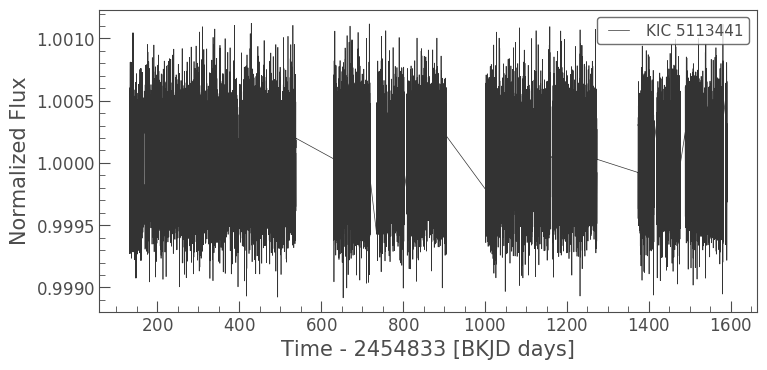

In [12]:
corr_lcs[5113441].plot()

In [14]:
snr = {}
for k,v in corr_lcs.items():
    snr[k] = v.to_periodogram(freq_unit=u.microHertz, normalization='psd',
                            maximum_frequency=288, minimum_frequency=1).flatten()

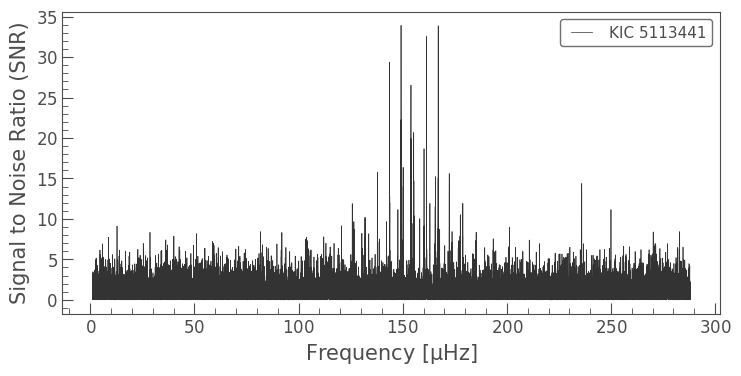

In [22]:
snr[5113441].plot()

In [16]:
seismo = {}
for k,v in snr.items():
    numax = v.estimate_numax()
    dnu = v.estimate_dnu(numax=numax)
    seismo[k] = [numax, dnu]

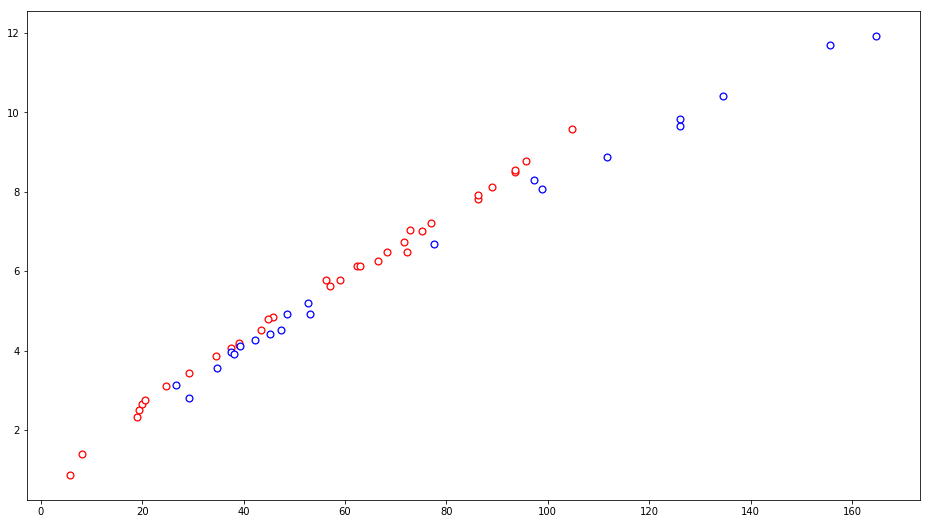

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[16,9])
text = False

for idx in NGC_6791_kics:
    ax.scatter(seismo[idx][0], seismo[idx][1], label='NGC_6791', s=50, c='r')
    ax.scatter(seismo[idx][0], seismo[idx][1], s=20, c='w')
    if text:
        ax.text(seismo[idx][0].value, seismo[idx][1].value, str(idx))
    
for idx in NGC_6819_kics:
    ax.scatter(seismo[idx][0], seismo[idx][1], label='NGC_6891', s=50, c='b')
    ax.scatter(seismo[idx][0], seismo[idx][1], s=20, c='w')
    if text:
        ax.text(seismo[idx][0].value, seismo[idx][1].value, str(idx))
#ax.set_xscale('log')
#ax.set_yscale('log')

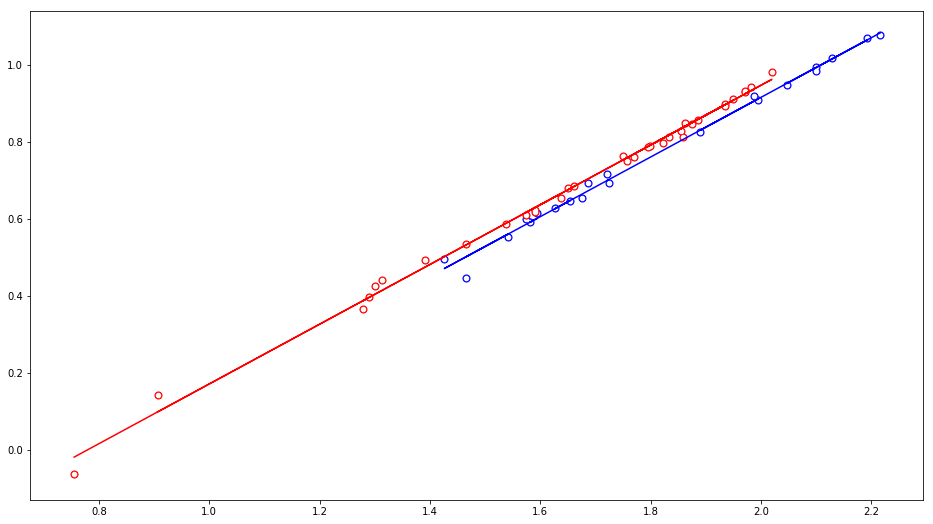

In [51]:
fig, ax = plt.subplots(figsize=[16,9])

numax_68 = [np.log10(seismo[n][0].value) for n in NGC_6819_kics]
dnu_68 = [np.log10(seismo[n][1].value) for n in NGC_6819_kics]
p68 = np.polyfit(numax_68, dnu_68, 1)
fit68 = np.poly1d(p68)(numax_68)
ax.plot(numax_68, fit68, 'b')

ax.scatter(numax_68, dnu_68, label='NGC_6819', s=50, c='b')
ax.scatter(numax_68, dnu_68, s=20, c='w')

numax_67 = [np.log10(seismo[n][0].value) for n in NGC_6791_kics]
dnu_67 = [np.log10(seismo[n][1].value) for n in NGC_6791_kics]
p67 = np.polyfit(numax_67, dnu_67, 1)
fit67 = np.poly1d(p67)(numax_67)
ax.plot(numax_67, fit67, 'r')

ax.scatter(numax_67, dnu_67, label='NGC_6791', s=50, c='r')
ax.scatter(numax_67, dnu_67, s=20, c='w')


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


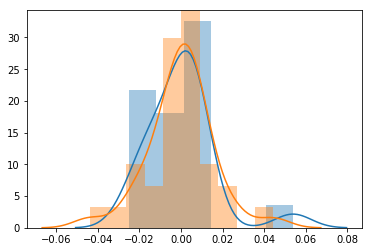

In [54]:
sns.distplot(fit68 - dnu_68)
sns.distplot(fit67 - dnu_67)

[<Quantity 71.58925003 uHz>, <Quantity 6.73379844 uHz>]


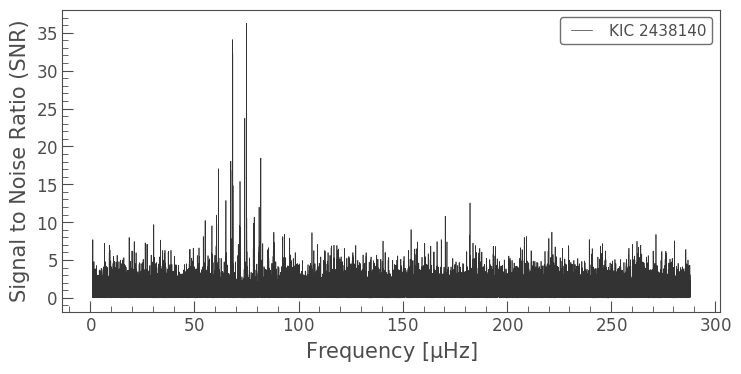

In [23]:
inspect = kics[np.random.randint(len(kics))]
print(seismo[inspect])
snr[inspect].plot()

(0.999, 1.0)

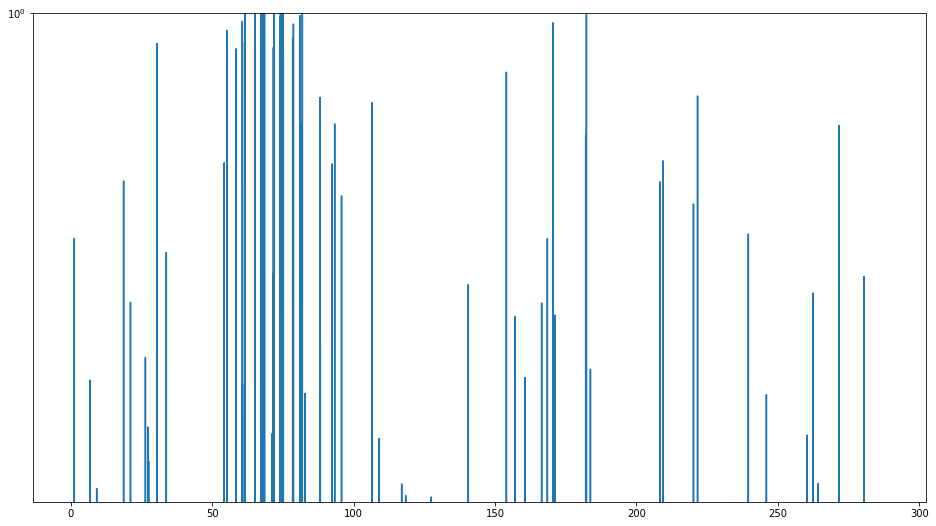

In [24]:
fig, ax = plt.subplots(figsize=[16,9])
f = snr[inspect].frequency.value
p = snr[inspect].power.value
ax.plot(f, 1- (np.exp(-p)))
ax.set_yscale('log')
ax.set_ylim([0.999,1.0])

71.5892500280102 uHz


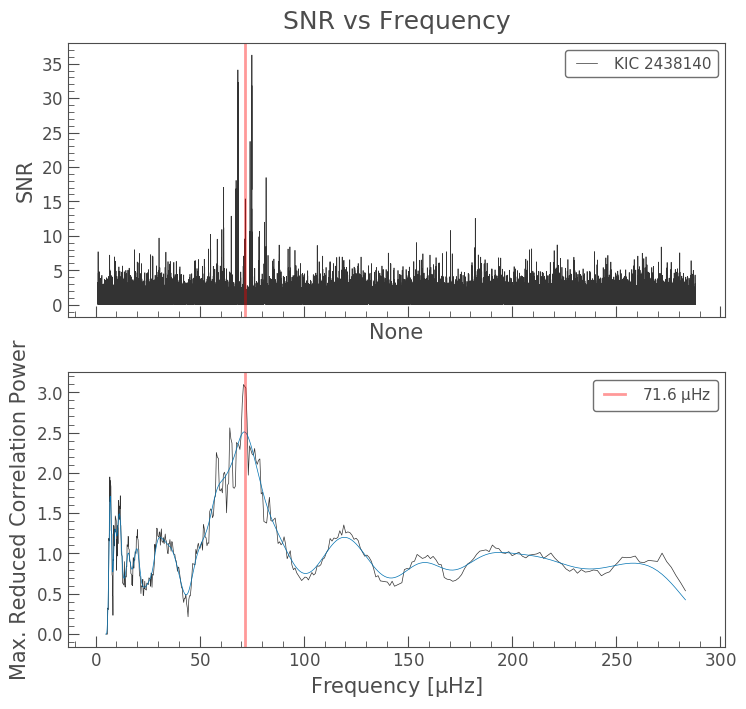

In [25]:
numax = snr[inspect].estimate_numax(show_plots=True)[0]
print(numax)

6.733798435855971 uHz


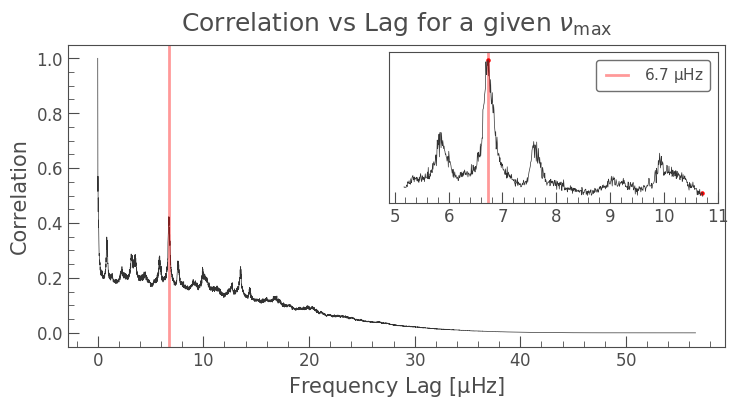

In [26]:
dnu = snr[inspect].estimate_dnu(numax=numax, show_plots=True)[0]
print(dnu)

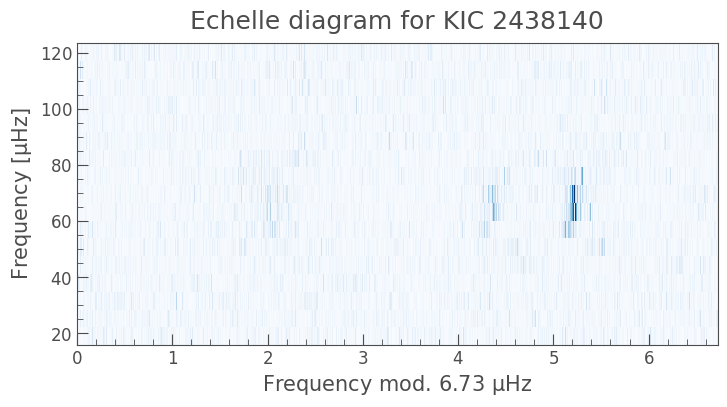

In [27]:
snr[inspect].plot_echelle(dnu=dnu, numax=numax, power_log=False)

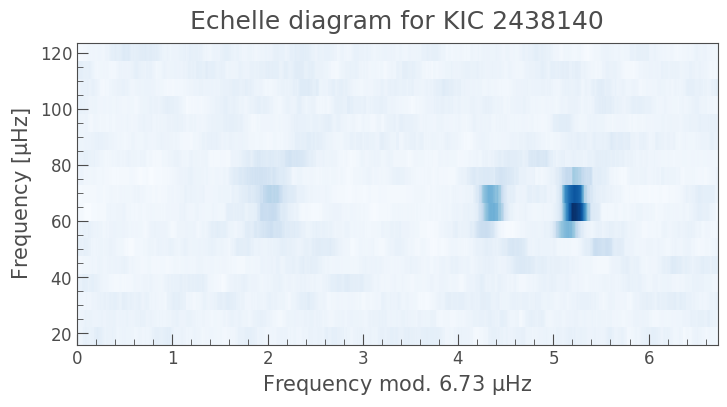

In [28]:
snr[inspect].smooth(filter_width=0.2).plot_echelle(dnu=dnu, numax=numax, power_log=False)